<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/ML_day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML_day5,6 정리

• 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정하에 사용하는 머신러닝 알고리즘 - n개의 특성(feature)을 가진 데이터는 n차원의 공간에 점으로 개념화 할 수 있다

• 유사한 특성을 가진 데이터들끼리는 거리가 가깝다  
분류를 알 수 없는 데이터에 대해 가장 가까운 이웃 k개의 분류를 확인하여 다수결에 의해 분류  

• KNN수행을 위한 학습 데이터들에 정규화 수행  
분류 효과를 높이기 위해 파라미터 - k값  
k가 너무 작을 때:Overfitting  
k가 너무 클 때: Underfitting  

최적의 k값은 시각화해서 엘보점

• K-최근접 이웃을 회귀분석에 적용 가능 (회귀에서는 수치를 예측)  
등급을 모르는 새로운 영화 데이터가 들어오면 거리 공식을 통해 가장 가까운 k개의 이웃을 찾을거다.  
이웃의 레이블 개수를 확인해서 다수결에 의해 영화의 등급 레이블 반환(분류)  
회귀에서는 이웃들의 평균을 계산해서 새로운 영화 데이터의 등급을 예측합니다


각 이웃이 얼마나 가까이 있는지에 따라 가중 평균(weighted average)

분자는 영화(이웃)의 점수를 각각 X로부터 떨어진 거리로 나눈 값의 합, 그리고 분모는 1을 각자 X로부터 떨어진 거리로 나눈 값의 합이다.

• 가중 평균을 적용하기 위해 weights = "distance" 인수 설정


### ML_day6 정리

• SVM - 분류되지 않은 새로운 데이터를 2차원으로 표현했을 때 최적의 분류 결정 경계를 찾아서 데이터를 분류, 3차원 이상일 때는 초평면의 분류 결정 경계를 찾아서 분류해주는 알고리즘

• Support Vectors - 결정 경계와 가까이 있는 데이터 포인트

• 마진(Margin) - 결정 경계와 서포트 벡터 사이의 거리

• SVM은 데이터 포인트들을 올바르게 분리하면서 마진의 크기를 최대화해야 하므로  
마진 안에 이상치를 어느정도 포함하도록 너그럽게 기준을 정하면 서포트 벡터와 결정 경계 사이에 거리가 멀어지고 -소프트마진, 언더피팅 문제가 발생할 수 있다  

• 개별적인 학습 데이터들을 다 포함하기 위해 이상치를 허용하지 않는 기준으로 결정 경계를 정해버리면 서포트 벡터와 결정 경계 사이의 거리가 매우 좁은 하드마진, 오버피팅 문제가 발생할 수 있다

• SVM모델이 오류를 어느정도 허용할 것인지 파라미터 - C

• SVM이 선형으로 분리 할 수 없는 데이터 세트의 경우 일부 아웃라이어에 맞추기 위해 비선형으로 결정 경계를 만듬 (kernel = poly, rbf, sigmoid)

• 결정 경계를 얼마나 유연하게 그을 것인지 설정 파라미터 - gamma

• gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. 이는 오버피티을 초래할 수 있다  

• SVM 알고리즘을 선형, 비선형 회귀에도 사용할 수 있습니다  

• 회귀에 적용하는 방법은 일정한 마진 오류 안에서, 두 클래스 간의 마진안에 가능한 많은 데이터 샘플이 들어가도록 학습

• 마진의 폭을 조정하는 하이퍼파라미터 epsilon






In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [5.0, 6.8, 9.0] #영화 데이터 등급
regressor.fit(training_points, training_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [ ]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = regressor.predict(unknown_points)

guesses

array([7.28143288, 7.76451922, 6.8457845 ])

svm실습 예제

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[0.01158103]
[252789.13921624]


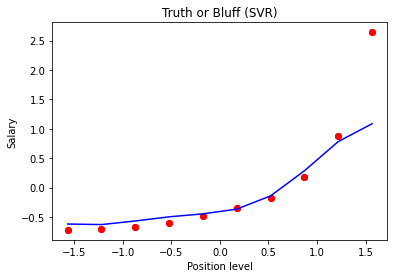

In [ ]:
# Visualising the SVR results
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### ML_day6 정리

잔차제곱의 합 : RSS

LinearRegressor - 예측값과 실제 값의 RSS를 최소화할 수 있도록 최적화된 회귀 계수를 찾아주는 머신러닝 알고리즘 클래스

Ridge, alpha, RidgeCV - 선형 회귀의 다중 특성중에서 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시켜서 회귀 계수값을 더 작게 만드는 규제 모델을 적용한 회귀분석 클래스

Lasso,alpha, LassoCV  - 선형 회귀의 다중 특성중에서 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 규제 모델을 적용한 회귀분석 클래스

L2, L1 규제를 계속 결합한 모델 - ElasticNet (피처가 많은 데이터 세트에서 적용, L1 규제로 피처의 개수, L2 규제로 계수 값의 크기를 조정)

### ML_day7 시작

#### 로지스틱 회귀

• 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

• 데이터가 2개의 범주 중 하나에 속하도록 결정하는 것을 2진 분류(binary classification)

• 순입력 함수의 리턴값을 z는 w의 값에 따라 실수 전체에 대해 매핑되는 값이며, z의 값에 따라 입력된 트레이닝 데이터가 X가 어떤 집단에 속하는지 아닌지 결정하게 되는 값입니다.

##### 이진 분류기 훈련

• 타깃 벡터의 값이 두개

• 로지스틱 회귀에서 선형 모델은 로지스틱 함수(시그모이드 함수)에 포함됩니다.

• 로지스틱 함수는 함수의 출력을 0과 1 사이로 제한하는 효과가 있습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]

In [ ]:
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

logistic_regression = LogisticRegression(random_state=0) # 로지스틱 회귀 모델 생성
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

In [ ]:
new_observation = [[.5, .5, .5, .5]] # 새로운 샘플 데이터 생성
model.predict(new_observation) # 클래스 예측

array([1])

In [ ]:
model.predict_proba(new_observation) # 예측 확률 확인

array([[0.17738424, 0.82261576]])

##### 다중 클래스 분류기 훈련

• OVR(one-vs-rest) 로지스틱 회귀는 클래스마다 모델을 만듭니다. (다중 분류 기법)

• OVR(one-vs-rest)는 개별 모델은 샘플이 해당 클래스에 속하는지 여부를 예측합니다(이진 분류 문제)

• 개별 분류 문제(클래스 0이거나 아니거나)는 독립적이라고 가정합니다

• 다항 로지스틱 회귀 (multinomial logistic regression) MLR는 로지스틱 함수를 소프트맥스 함수로 바꿉니다.

• MLR은 predict_proba()를 사용해 예측한 확률을 더 신뢰할 수 있습니다(보정이 잘 되어 있습니다)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

# OVR 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

In [ ]:
new_observation = [[.5, .5, .5, .5]] # 새로운 샘플 데이터 생성
model.predict(new_observation) # 클래스 예측

array([2])

In [ ]:
model.predict_proba(new_observation) # 예측 확률 확인

array([[0.0387617 , 0.40669108, 0.55454723]])

• 로지스틱 회귀에서 사용되는 정규화 기법은 L2 정규화이며 규제는 복잡한 모델에 패널티를 가해 분산을 줄이는 방법으로  
λ 를 정규화 파라미터라고 부르며, C값은 λ 의 역수로 정의합니다.  

• C값을 감소시키면 λ가 커지게 되며, 정규화를 강하게 한다는 의미입니다

##### 규제로 분산 줄이기

• 규제는 복잡한 모델에 패털티를 가해 분산을 줄이는 방법입니다

• 규제는 최소화하려는 손실함수에 패널티 항을 추가합니다

• 규제 강도를 조절하는 하이퍼파라미터 C를 사용합니다

• LogisticRegressionCV를 사용하여 효율적으로 C 값을 튜닝할 수 있습니다. (매개변수 Cs에서 탐색할 C의 범위
를 입력할 수 있습니다.)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터를 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

# 로지스틱 회귀 모델 객체 생성
logistic_regression = LogisticRegressionCV( penalty='l2', Cs=10, random_state=0, n_jobs=-1)
model = logistic_regression.fit(features_standardized, target) # 모델 훈련
logistic_regression.C_

array([21.5443469, 21.5443469, 21.5443469])

##### 대용량 데이터에서 분류기 훈련

• LogisticRegression에서 solver 매개변수를 확률적 평균 경사 하강법으로 지정하여 로지스틱 회귀를 학습시킵
니다.

• 데이터셋이 매우 클 때 확률적 평균 경사 하강법이 다른 방법보다 훨씬 빠르게 모델을 훈련할 수 있습니다.

• 확률적 평균 경사 하강법은 특성의 스케일이 매우 민감하기 때문에 특성 표준화가 매우 중요합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

# 로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(random_state=0, solver="sag")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

### 타이타닉 실습 예제

#### 1. 타이타닉 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv('titanic_train.csv')

print(titanic_df.info())
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   N

In [ ]:
#결측치 처리, DataFrame의 fillna()함수를 사용해서 간단하게 Null값을 평균 또는 고정 값 대체
#Age의 경우는 평균 나이, 나머지 칼럼은 ‘N’ 값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace = True)
print('데이터 셋 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 셋 Null 값 개수 0


In [ ]:
#값 분류

print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Pclass 값 분포 :\n',titanic_df['Pclass'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Pclass 값 분포 :
 3    491
1    216
2    184
Name: Pclass, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


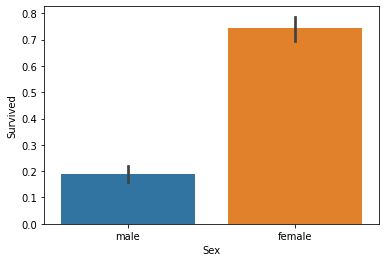

In [ ]:
#성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교

titanic_df.groupby(['Sex','Survived'])['Survived'].count()

sns.barplot(x='Sex',y='Survived',data=titanic_df)

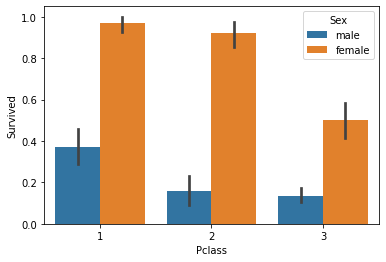

In [ ]:
#부자와 가난한 사람의 생존확률 , 일등실, 이등실, 삼등실에 따라 생존확률

sns.barplot(x='Pclass',y='Survived',hue = 'Sex',data=titanic_df)

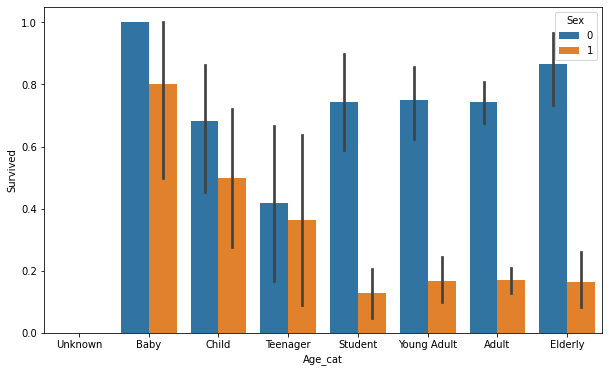

In [ ]:
# 나이에 따른 생존확률
## 입력 age 에 따라 구분 값을 반환하는 함수 설정, DataFrame의 apply lambda 식에 사용.

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

#막대 그래프의 크기 figure를 설정
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] =titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived',hue ='Sex', data=titanic_df,order=group_names)  #hue 옵션으로 bar 구분이 가능

여자 Baby의 경우 비교적 생존 확률이 높음  
아쉽게도 여자 Child의 경우는 다른 연령대에 비해 생존 확률이 낮다.  
그리고 여자 Senior의 경우는 매우 생존 확률이 높음.

#### 2. 문자열 카테고리 인코딩

In [ ]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Age_cat','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,7.2500,146,3,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,71.2833,81,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,7.9250,146,3,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,53.1000,55,3,0
4,5,0,3,"Allen, Mr. William Henry",1,48,0,0,373450,8.0500,146,3,0


In [ ]:
# LabelEncoder 클래스를 이용해 레이블인코딩을 적용

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0,inplace = True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df= format_features(df)
    return df

#### 3. 생존 결과 예측

In [ ]:
#원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
from sklearn.preprocessing import LabelEncoder

titanic_df =pd.read_csv('titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [ ]:
#내려받은 학습 데이터 셋을 기반으로 해서 train_test_split() API를 이용해 별도의 테스트 데이터 셋을 추출

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [ ]:
#ML 알고리즘 사용

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     

    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# exec_kfold 호출
exec_kfold(dt_clf , folds=5)  #결정트리
print('------------------------------')
exec_kfold(rf_clf , folds=5)  #Random Forest
print('------------------------------')
exec_kfold(lr_clf , folds=5)  #로지스틱 회귀

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823
------------------------------
교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.8090
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8148
------------------------------
교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7472
교차 검증 4 정확도: 0.8090
평균 정확도: 0.7834


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# cross_val_score() 클래스를 이용해 교차 검증을 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


cross_val_score()와 방금 전 K폴드의 평균 정확도가 약간 다른데 이는 cross_val__score()가 StratifiedKFold를 이용해 폴드 셋을 분할하기 때문이다.

In [ ]:
#하이퍼 파라미터 추적
#GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


GridSearchCV는 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공 (검증 기반)

estimator : classifier, regressor, pipeline이 사용될 수 있습니다

param_grid : key+ 리스트값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정

scoring : 예측 성능을 측정할 평가 방법을 지정 

cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정

refit : default가 true이며 true로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 estimator 객체를 해당 하이퍼 파라미터로 재학습

### 나이브 베이즈

베이즈 정리(Bayes’ Theorem)

• 베이즈 정리(Bayes’ Theorem)는 새로운 사건의 확률을 계산하기 전에 이미 일어난 사건을 고려하는 것을 전
제로 하는 베이즈 (혹은 베이지안) 통계의 근간이라 할 수 있다.

• 독립 사건(Independent Events) - 사건이 독립적이라는 건 어떤 사건이 발생하더라도 그게 다른 사건이 발생 확률에 영향을 미치지 않는다는 뜻이다

• 조건부 확률(conditional probability)은 어떤 사건 B가 발생했을 때 사건 A가 발생할 확률을 의미한다.

• 두 사건이 서로 독립적이라면 그냥 각각의 사건이 발생할 확률을 곱하면 된다

• P(A∩B) = P(A) × P(B)


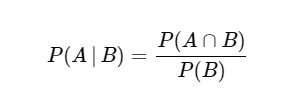

##### 연속적인 특성으로 분류기 훈련

• 베이즈 이론은 새로운 정보 P(A|B)와 사건의 사전 확률P(A)가 주어졌을 때 어떤 사건이 일어날 확률을 이해하는 방법입니다.

In [83]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

classifer = GaussianNB() # 가우시안 나이브 베이지 객체 생성
model = classifer.fit(features, target) # 모델 훈련
new_observation = [[ 4, 4, 4, 0.4]] #New Sample Data
model.predict(new_observation) # 클래스 예측

array([1])

In [85]:
# 각 클래스별 사전 확률을 지정한 가우시안 나이브 베이즈 객체 생성
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
model = classifer.fit(features, target) # 모델 훈련

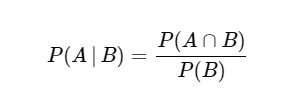

조건부 확률  

P(A|B) = P(A∩B) / P(B)

##### 이산적인 카운트 특성으로 분류기 훈련

• 다항 나이브 베이즈가 가장 많이 사용되는 경우 중 하나는 BoW(bag of words)나 tf-idf 방식을 사용한 텍스트
분류입니다.

In [87]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['I love Brazil. Brazil!',
'Brazil is best',
'Germany beats both'])

count = CountVectorizer() # BoW(bag of words)를 만듭니다.
bag_of_words = count.fit_transform(text_data)
features = bag_of_words.toarray() # 특성 행렬을 만듭니다.
target = np.array([0,0,1]) # 타깃 벡터를 만듭니다.
print(features)
print(target)

[[0 0 0 2 0 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 0]]
[0 0 1]


In [88]:
#MultinomialNB를 사용해 두 클래스(brazil과 germany)에 대한 사전 확률을 지정하여 모델을 훈련
# 각 클래스별 사전 확률을 지정한 다항 나이브 베이즈 객체를 만듭니다.
classifer = MultinomialNB(class_prior=[0.25, 0.5])
model = classifer.fit(features, target) # 모델 훈련
new_observation = [[0, 0, 0, 1, 0, 1, 0]] #New Sample Data 1은 brazil, is
model.predict(new_observation) # 새로운 샘플의 클래스 예측

array([0])

실습 예제


1 weather, temp, play를 LabelEncoder로 변환  
2 (weather, temp) 로 변환해서 리스트에 저장  
3 Gaussian Classifier 객체 생성, 학습  
4 새로운 데이터 [0, 2] (overcast, mild) 예측

In [101]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [103]:
# 1 weather, temp, play를 LabelEncoder로 변환  
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print(weather_encoded)
print("Temp:",temp_encoded)
print("Play:",label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [104]:
# 2 (weather, temp) 로 변환해서 리스트에 저장

features = zip(weather_encoded,temp_encoded)
features = list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [105]:
# 3 Gaussian Classifier 객체 생성, 학습

from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

# 4 새로운 데이터 [0, 2] (overcast, mild) 예측
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) # 1: Yes

Predicted Value: [1]


실습 예제2

In [109]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

print("Features: ", wine.feature_names)
print("Labels: ", wine.target_names)

print(wine.data.shape)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
(178, 13)


In [110]:
print(wine.data[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [111]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [112]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


### 군집

##### Clustering(군집화)

• 레이블이 없는 데이터 안에서 패턴과 구조를 발견하는 비지도 학습

• 레이블을 모르더라도 그냥 비슷한 속성을 가진 데이터들끼리 묶어주는 역할 한다


K-평균 (K-Means) 군집화

• K는 데이터 세트에서 찾을 것으로 예상되는 클러스터(그룹) 수

• Means 는 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균 거리

• k-평균(k-means) 군집 알고리즘은 샘플을 거의 동일한 분산을 가지는 k개의 그룹으로 나눕니다.

• 그룹의 개수 k는 하이퍼파라미터로 사용자가 지정

##### K-Means++ 알고리즘

• K-Means 알고리즘의 단점 :
처음에 지정하는 중심점(centroid)의 위치를 무작위로 결정하기 때문에 최적의 클러스터로 묶어
주는 데에는 한계가 있다

• K-Means++는 전통적인 K-Means의 문제, 즉 중심점 무작위 선정의 문제를 해결하기 위한 알고리
즘

• K-Means++클러스터링의 원리 :
1. 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 그 녀석을 첫번째 중심점으로 지
정한다.

2. 나머지 데이터 포인트들에 대해 그 첫번째 중심점까지의 거리를 계산한다.

3. 두번째 중심점은 각 점들로부터 거리비례 확률에 따라 선택한다 (이미 지정된 중심점으로부터
최대한 먼 곳에 배치된 데이터포인트를 그 다음 중심점으로 지정한다)

4. 중심점이 k개가 될 때까지 2, 3번을 반복한다.

• K-Means++클러스터링의 장점 :

초기 중심점을 더욱 전략적으로 배치하기 때문에 전통적인 K-Means보다 더 최적의 군집화를 할
수 있다.

K-Means보다 알고리즘이 수렴하는 속도가 빠르다.

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris() # 데이터 로드
features = iris.data

scaler = StandardScaler() # 특성 표준화
features_std = scaler.fit_transform(features)

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1) # k-평균 객체 생성
model = cluster.fit(features_std) # 모델 훈련
print(model.labels_) # 예측 클래스 확인
print(iris.target) # 진짜 클래스 확인

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [121]:
new_observation = [[0.8, 0.8, 0.8, 0.8]] #New Sample Data
model.predict(new_observation) # 샘플의 클러스터를 예측
model.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

##### K-평균을 사용한 군집

• K-Means++ 알고리즘은 중심 포인트 하나를 먼저 랜덤하게 선택하고 그 다음부터는 이전 중심 포인트와의
거리를 고려하여 다음 중심 포인트를 선택

• KMeans 클래스의 init 매개변수 기본값은 k-means++

• n_init 횟수만큼 반복하여 최상의 결과를 만드는 중심 포인트를 찾습니다. (기본값 10)

• 데이터들이이 얼마나 퍼져 있는지 (혹은 얼마나 뭉쳐있는지) 응집도는 inertia 값으로 확인한다.

• inertia는 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미하기 때문에 inertia 값이 낮을수록 군집화가 더 잘 됐다고 볼 수 있다

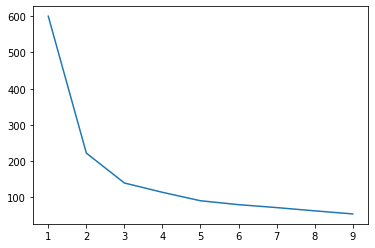

In [123]:
model.inertia_
model.score(features_std)
model.transform(new_observation)

inertia = []
for n in range(1, 10):
  kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1)
  inertia.append(kmeans.fit(features_std).inertia_)

plt.plot(range(1, 10), inertia)
plt.show()

In [148]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [150]:
print(train.isna().sum())
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [151]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [152]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])

train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-n

In [153]:
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

In [154]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)  #init='k-means++'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [155]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [156]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263
